# ✍️ Handwritten Digit Recognizer – Model Training (Google Colab)

This notebook walks through the complete process of building a Convolutional Neural Network (CNN) to classify handwritten digits using the MNIST dataset.


## 1. 📦 Importing Dependencies

We import TensorFlow, NumPy, Matplotlib, and other required libraries to train and evaluate the model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## 2. 📊 Loading and Exploring MNIST Dataset

We load the dataset using TensorFlow/Keras and visualize a few sample images to understand the data.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


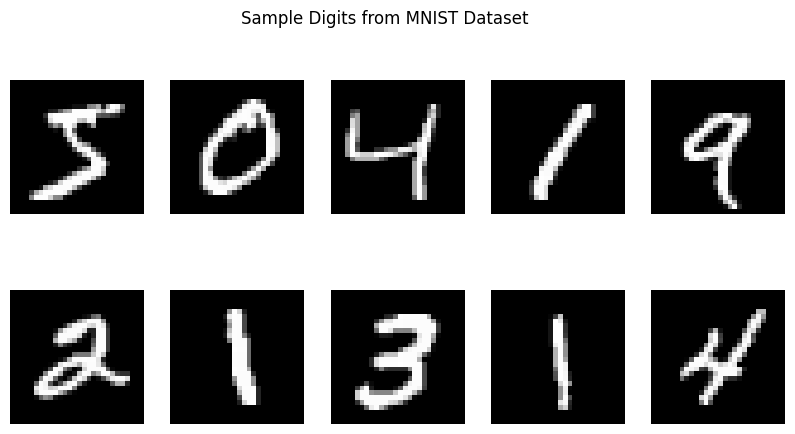

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizing a few sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Digits from MNIST Dataset')
plt.show()


## 3. 🧼 Preprocessing the Data

We normalize pixel values to a 0–1 range and reshape the data to be compatible with the CNN input shape.


In [3]:
# Normalize pixel values to range 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data to fit CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



## 4. 🧠 Building the CNN Model

Here we define a simple Convolutional Neural Network using `Sequential` API. The model includes:

- Two convolutional layers
- MaxPooling
- Flatten + Dense layers
- Softmax for classification


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Print summary of the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,146 (1.97 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

## 5. 🏋️‍♂️ Compiling and Training the Model

We compile the model using `categorical_crossentropy` loss and `Adam` optimizer, and train it for 5–10 epochs.


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.8637 - loss: 0.4405 - val_accuracy: 0.9787 - val_loss: 0.0712
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9821 - loss: 0.0597 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.9880 - loss: 0.0394 - val_accuracy: 0.9854 - val_loss: 0.0469
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9919 - loss: 0.0257 - val_accuracy: 0.9865 - val_loss: 0.0455
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9883 - val_loss: 0.0440
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9966 - loss: 0.0119 - val_accuracy: 0.9866 - val_loss: 0.0478
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.9848 - val_loss: 0.0586
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9973 - loss: 0.0081 -

## 6. 📈 Visualizing Accuracy and Loss

We plot training vs. validation accuracy and loss to understand how the model is learning over time.


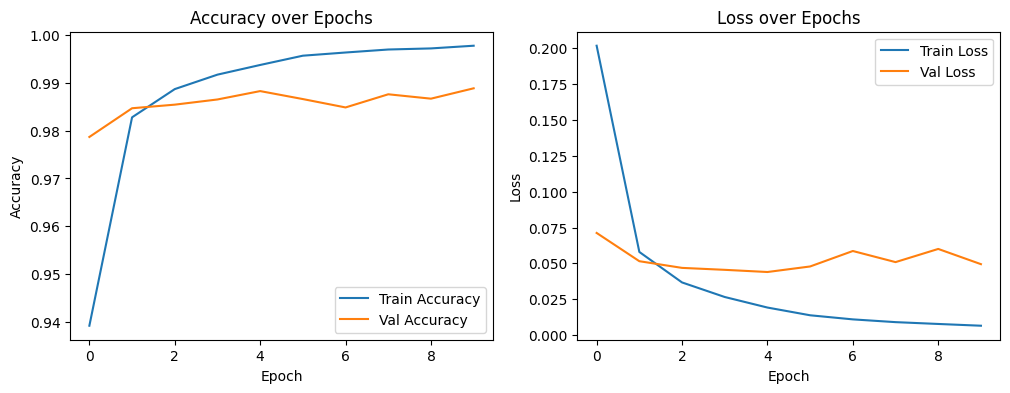

In [6]:
# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 7. 📊 Model Evaluation on Test Set

Evaluate the trained model's performance on unseen test data.


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9899


## 8. 💾 Saving the Model for Deployment

We save the trained model in `.keras` format so it can be loaded in our web app.


In [8]:
model.save("digit_recognizer_model.keras")


In [9]:
from google.colab import files
files.download("digit_recognizer_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 9. 🧪 Making Sample Predictions

Visualize predictions on some test images using the trained model.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


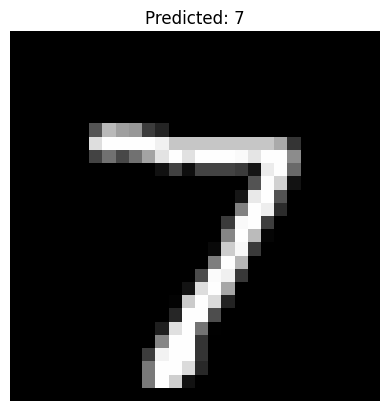

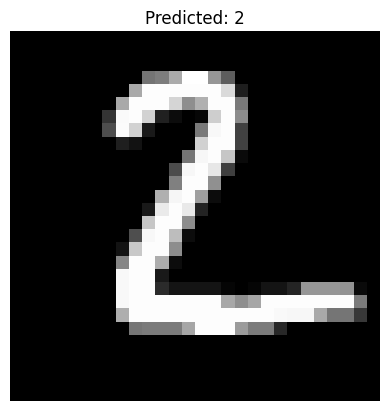

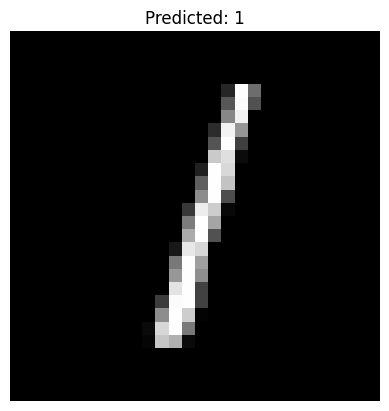

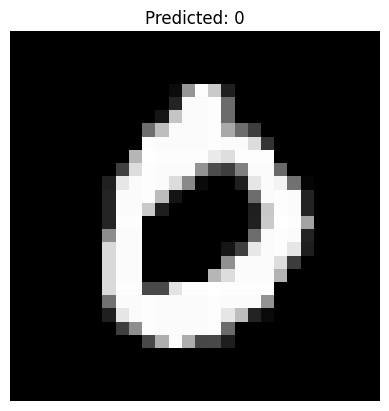

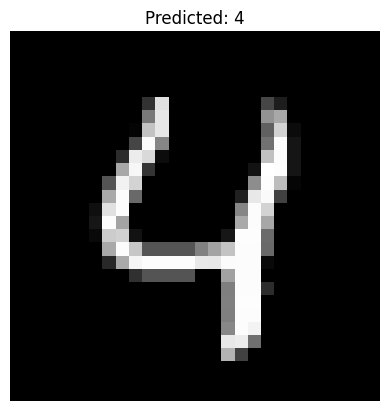

In [10]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


## 10. 📚 Summary & Learnings

- Built and trained a CNN to classify handwritten digits (MNIST)
- Achieved high accuracy on validation and test sets
- Learned preprocessing, model creation, evaluation, and saving for deployment
